## WeatherPy

Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. 

[OpenWeatherMap API](https://openweathermap.org/api) and a little common sense to create a representative model of weather across world cities.

Objective is to build a series of scatter plots to showcase the following relationships and analyze the behaviors:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude


In [2]:
# Import needy libraries 

import pandas as pd
from citipy import citipy
import numpy as np
import requests as req
import matplotlib.pyplot as plt
from api_key import weather

In [3]:
api_key = weather

## Generate Cities List

In [4]:
# Generate Random 500 latitude and longitude

lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)

In [5]:
# Get the target url to test it 

target_url = 'http://samples.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid=' + api_key
print(target_url)

http://samples.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid=1ea85dc7bfe9158850a836f14383884d


In [6]:
# Define the empty lists 

city_names = []
country_code = []
cloudines = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

## Perform API Calls

In [7]:
# Set up a for loop for 500 random samples

for i in range(0,500):
    
    city = citipy.nearest_city(lats[i],lngs[i])
    
    # Append the city and country names to the empty lists 
    
    city_names.append(city.city_name)
    country_code.append((city.country_code).upper())
    
    # Set up the params for the base url
    params = {
    'lat': lats[i],
    'lon': lngs[i],
    'units': 'metric',
    'APPID': api_key
    }
    
    # Set up the base url 
    base_url = "http://api.openweathermap.org/data/2.5/forecast"
    response = req.get(base_url, params = params)
    print(response.url)
    
    city_weather = response.json()
    
    # Fill up the empty list based on API response from the url 
    cloudines.append(city_weather['list'][0]['clouds']['all'])
    date.append(city_weather['list'][0]['dt'])
    humidity.append(city_weather['list'][0]['main']['humidity'])
    
    lat.append(round(lats[i]))
    lng.append(round(lngs[i]))
    
    max_temp.append(city_weather['list'][0]['main']['temp_max'])
    wind_speed.append(city_weather['list'][0]['wind']['speed'])

http://api.openweathermap.org/data/2.5/forecast?lat=-70.5706967668&lon=65.9380835995&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-69.5503504008&lon=144.117699064&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-22.3578648207&lon=165.637374142&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-24.9760572107&lon=136.672160277&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=71.4987310168&lon=62.6590134466&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-66.6988785184&lon=18.3317322108&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-48.1298082979&lon=132.217712407&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/for

http://api.openweathermap.org/data/2.5/forecast?lat=-10.2504043859&lon=-52.9017874934&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-18.7437122516&lon=42.1921472404&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=85.9199777932&lon=-119.894471895&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-39.9882882667&lon=76.5571167794&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-27.9969097018&lon=-140.509362898&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-20.7494841412&lon=-119.379180368&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=12.9345225857&lon=-91.2016677629&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5

http://api.openweathermap.org/data/2.5/forecast?lat=30.9884774951&lon=71.4253346756&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-31.6989362206&lon=128.372219371&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=14.0680775675&lon=-114.956890359&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=18.417918536&lon=-28.2224227109&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=57.1727167105&lon=-39.2914914017&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=76.8751001766&lon=104.170174335&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-49.1403467405&lon=-22.6478700916&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/fore

http://api.openweathermap.org/data/2.5/forecast?lat=-31.017250755&lon=-165.508424305&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-33.3649510964&lon=29.0526326655&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=5.51015603771&lon=144.181530635&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=3.85594176303&lon=49.9158425682&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-74.4782455252&lon=-131.987823053&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-67.4663587214&lon=-64.2098043774&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-71.974583962&lon=159.366992159&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/for

http://api.openweathermap.org/data/2.5/forecast?lat=82.5088903736&lon=-59.546989403&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=44.5073871253&lon=-46.5228355974&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-1.02595987305&lon=121.036322998&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=36.760895926&lon=44.4299391861&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-84.5773932765&lon=150.943049912&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=53.4757731819&lon=-149.369022399&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=66.0884005585&lon=160.958628312&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/foreca

http://api.openweathermap.org/data/2.5/forecast?lat=49.5065682687&lon=5.4142928221&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=56.1590894189&lon=-19.4346169073&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=77.8779795277&lon=-69.0471383316&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=10.048230726&lon=-157.353992691&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-13.9977415427&lon=154.559013915&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=68.3030426454&lon=86.0019068702&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-44.3873217683&lon=81.5612974757&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/foreca

http://api.openweathermap.org/data/2.5/forecast?lat=-27.3091466728&lon=91.5285505572&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-34.3802253479&lon=-54.1980913742&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-22.7885473584&lon=-6.48549510824&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=67.5601124868&lon=124.733263338&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-74.1249888124&lon=-134.129356605&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=9.44886482502&lon=-101.715564233&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-3.30873560125&lon=-75.4634561211&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5

http://api.openweathermap.org/data/2.5/forecast?lat=-67.5088012691&lon=107.284007543&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-27.7102579548&lon=-41.3200719723&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-76.5985913323&lon=-40.3297076611&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-41.606612596&lon=-101.623200175&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-64.0267273245&lon=-95.7425578381&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=50.8745171058&lon=-23.826470528&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-2.28783028383&lon=-104.738481905&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5

http://api.openweathermap.org/data/2.5/forecast?lat=-63.0578232475&lon=-101.302944463&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=34.3954373456&lon=-171.544546995&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=44.110474272&lon=14.5878996165&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-12.1294039964&lon=-147.439352313&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=23.2039186184&lon=-72.4378443624&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=56.8518445984&lon=-34.9753518652&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/forecast?lat=-67.5124043873&lon=90.3782891213&units=metric&APPID=1ea85dc7bfe9158850a836f14383884d
http://api.openweathermap.org/data/2.5/fo

In [8]:
# Create the dictionary

city_data = {
    'City':city_names,
    'Cloudines': cloudines,
    'Country': country_code,
    'Date': date,
    'Humidity':humidity,
    'Lat':lat,
    'Lng':lng,
    'Max Temp':max_temp,
    'Wind Speed': wind_speed,
    }

In [9]:
# Covert the dictionary to a data frame 
city_data = pd.DataFrame(city_data)
city_data.head()

,City,Cloudines,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,taolanaro,36,MG,1510876800,73,-71.0,66.0,-21.68,8.41
1,hobart,0,AU,1510876800,81,-70.0,144.0,-25.23,9.66
2,bouloupari,8,NC,1510876800,100,-22.0,166.0,22.40,8.01
3,alice springs,8,AU,1510876800,33,-25.0,137.0,27.15,2.91
4,amderma,88,RU,1510876800,100,71.0,63.0,-0.60,10.66


## Latitude vs Temperature Plot

In [10]:
plt.scatter(city_data['Lat'], city_data['Max Temp'], marker = 'o', color = 'b', alpha = 0.50, edgecolors="black")

plt.title('City Latitude vs Max Temperature (11/16/2017)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celcius)')
plt.grid(True)
plt.style.use('seaborn-darkgrid')
plt.xlim(-100, 100)

plt.savefig('CityLatitudeVsMaxTemperature')

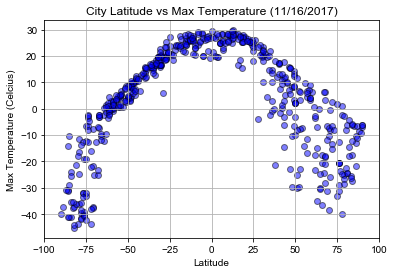

In [11]:
plt.show()

## Latitude vs. Humidity Plot

In [12]:
plt.scatter(city_data['Lat'], city_data['Humidity'], marker = 'o', color = 'b', alpha = 0.50, edgecolors="black")

plt.title('City Latitude vs Humidity (11/16/2017)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.grid(True)
plt.style.use('seaborn-darkgrid')
plt.xlim(-100, 100)

plt.savefig('CityLatitudeVsHumidity')

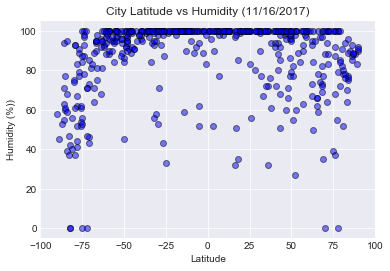

In [13]:
plt.show()

## Latitude vs. Cloudiness Plot

In [14]:
plt.scatter(city_data['Lat'], city_data['Cloudines'], marker = 'o', color = 'b', alpha = 0.50, edgecolors="black")

plt.title('City Latitude vs Cloudines (11/16/2017)')
plt.xlabel('Latitude')
plt.ylabel('Cloudines (%))')
plt.grid(True)
plt.style.use('seaborn-darkgrid')
plt.xlim(-100, 100)

plt.savefig('CityLatitudeVsCloudines')

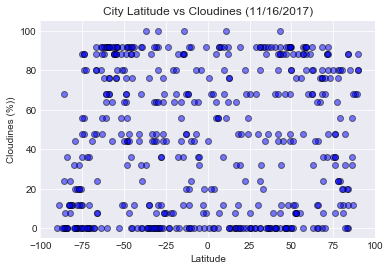

In [15]:
plt.show()

## Latitude vs. Wind Speed Plot

In [16]:
plt.scatter(city_data['Lat'], city_data['Wind Speed'], marker = 'o', color = 'b', alpha = 0.50, edgecolors="black")

plt.title('City Latitude vs Wind Speed (11/16/2017)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.style.use('seaborn-darkgrid')
plt.xlim(-100, 100)

plt.savefig('CityLatitudeVsWind Speed')

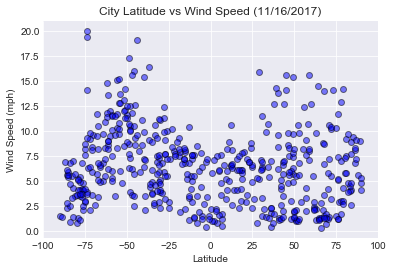

In [17]:
plt.show()